<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E8%B2%9D%E6%B0%8F%E5%88%86%E9%A1%9E/sklearn%E5%AF%A6%E4%BD%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install wget

In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

### 如何使用 scikit-learn 的 `GaussianNB` 模型來進行分類。
- 我們將使用一個簡單的數據集，其中包含兩個特徵（例如，花瓣長度和花瓣寬度），並預測鳶尾花的種類（0、1 或 2）。

### Iris 資料集中每一筆資料長這樣：
特徵：
- 花萼長度
- 花萼寬度
- 花瓣長度
- 花瓣寬度

目標類別：
- 山鳶尾 / 變色鳶尾 / 維吉尼亞鳶尾

### 條件獨立假設意思是：
在已知花的品種（例如：Setosa）的情況下:

→ `花萼長度`和`花瓣長度`的機率是獨立的,`花萼長度`和`花瓣長度`2個沒有關聯性

模型準確度：0.90


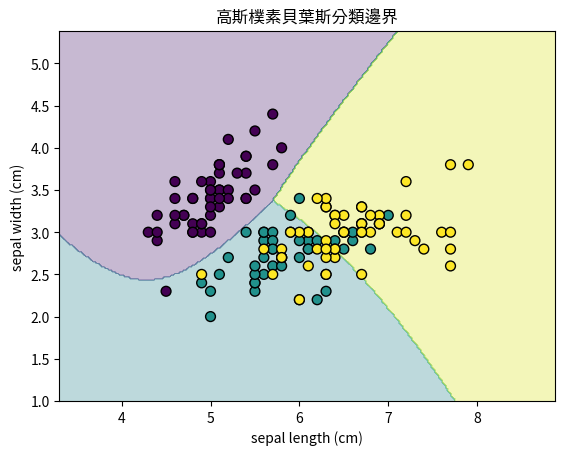

In [ ]:
#說明1是所有程式碼的說明
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 1. 載入數據集
# 使用iris.keys(),可以查出所有的key
iris = load_iris()
X = iris.data[:, :2]  # 花萼長度和花萼寬度
y = iris.target

# 2. 分割訓練集和測試集
# 只有使用花萼長度和花萼寬度
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立高斯樸素貝葉斯模型
model = GaussianNB()

# 4. 訓練模型
model.fit(X_train, y_train)

# 5. 進行預測
y_pred = model.predict(X_test)

# 6. 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度：{accuracy:.2f}")

# 7. 可視化決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('高斯樸素貝葉斯分類邊界')
plt.show()

# 說明1:高斯樸素貝葉斯分類器程式碼詳細說明

## 1. 匯入程式庫

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib as mlp
from matplotlib.font_manager import fontManager
```

- **目的**：匯入數據處理、機器學習和視覺化所需的程式庫。
- **詳細說明**：
  - `numpy`（別名 `np`）：用於數值計算，特別是陣列和網格的創建。
  - `matplotlib.pyplot`（別名 `plt`）：支援數據的繪圖和視覺化。
  - `sklearn.datasets.load_iris`：提供 Iris 數據集的存取。
  - `sklearn.model_selection.train_test_split`：將數據集分割為訓練集和測試集。
  - `sklearn.naive_bayes.GaussianNB`：實現高斯樸素貝葉斯演算法。
  - `sklearn.metrics.accuracy_score`：計算模型的準確度。
  - `matplotlib`（別名 `mlp`）和 `fontManager`：用於配置 matplotlib 和管理自定義字型。

## 2. 配置繁體中文字型

```python
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')
```

- **目的**：確保繪圖中的繁體中文文字（例如標籤和標題）正確顯示。
- **詳細說明**：
  - `fontManager.addfont('ChineseFont.ttf')`：載入 TrueType 字型檔案（`ChineseFont.ttf`）以渲染繁體中文字符。該檔案必須位於工作目錄或指定路徑中。
  - `mlp.rc('font', family='ChineseFont')`：將 matplotlib 的預設字型家族設為載入的繁體中文字型，確保繪圖中的所有文字使用此字型。

## 3. 載入 Iris 數據集

```python
iris = load_iris()
X = iris.data[:, :2]  # 花萼長度和花萼寬度
y = iris.target
```

- **目的**：載入 Iris 數據集並提取部分特徵以進行分類。
- **詳細說明**：
  - `load_iris()`：獲取 Iris 數據集，包含 150 個鳶尾花樣本，每個樣本具有四個特徵（花萼長度、花萼寬度、花瓣長度、花瓣寬度）以及目標標籤（0、1 或 2，分別代表三個品種：Setosa、Versicolor、Virginica）。
  - `X = iris.data[:, :2]`：僅選擇前兩個特徵（花萼長度和花萼寬度），以便於在二維平面進行視覺化。`iris.data` 是一個形狀為 `(150, 4)` 的 NumPy 陣列。
  - `y = iris.target`：將目標標籤（品種）分配給 `y`，這是一個形狀為 `(150,)` 的 NumPy 陣列。
  - **備註**：程式碼中的中文註釋（"花萼長度和花萼寬度"）表明所選特徵為花萼長度和花萼寬度。

## 4. 分割數據集

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **目的**：將數據集分為訓練集和測試集。
- **詳細說明**：
  - `train_test_split`：根據 `test_size=0.2` 將數據分為訓練集（80%）和測試集（20%）。
  - `X_train`, `y_train`：訓練特徵和標籤，用於訓練模型。
  - `X_test`, `y_test`：測試特徵和標籤，用於評估模型。
  - `random_state=42`：通過固定隨機種子確保分割的可重現性。

## 5. 建立高斯樸素貝葉斯模型

```python
model = GaussianNB()
```

- **目的**：初始化高斯樸素貝葉斯分類器。
- **詳細說明**：
  - `GaussianNB`：scikit-learn 提供的一個類別，實現假設特徵符合高斯（正態）分佈的樸素貝葉斯演算法。
  - 該模型適用於連續數據，例如 Iris 數據集中的花萼測量值。

## 6. 訓練模型

```python
model.fit(X_train, y_train)
```

- **目的**：使用訓練數據訓練高斯樸素貝葉斯模型。
- **詳細說明**：
  - `fit(X_train, y_train)`：根據訓練數據估計高斯分佈的參數（每個特徵在每個類別中的均值和方差）。
  - 模型學習每個品種（Setosa、Versicolor、Virginica）的花萼長度和寬度的概率分佈。

## 7. 進行預測

```python
y_pred = model.predict(X_test)
```

- **目的**：使用訓練好的模型對測試集進行標籤預測。
- **詳細說明**：
  - `predict(X_test)`：將訓練好的模型應用於測試特徵（`X_test`）以預測類別標籤。
  - `y_pred`：一個包含測試集預測標籤的 NumPy 陣列。

## 8. 評估模型

```python
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度：{accuracy:.2f}")
```

- **目的**：通過計算準確度評估模型的性能。
- **詳細說明**：
  - `accuracy_score(y_test, y_pred)`：計算測試集中正確預測的標籤比例，與真實標籤（`y_test`）進行比較。
  - 準確度格式化為兩位小數（`:.2f`），並以中文標籤（"模型準確度"）輸出。
  - **備註**：由於僅使用兩個特徵，準確度可能低於使用全部四個特徵的情況，因為模型可用的信息較少。

## 9. 視覺化決策邊界

```python
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('高斯樸素貝葉斯分類邊界')
plt.show()
```

- **目的**：在二維圖中視覺化分類器的決策邊界和數據點。
- **詳細說明**：
  - **創建網格**：
    - `x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1`：確定花萼長度的範圍，增加 1 單位的邊距。
    - `y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1`：確定花萼寬度的範圍。
    - `np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))`：以 0.02 的步長創建覆蓋特徵空間的網格。
    - `xx`, `yy`：表示網格點座標的二維陣列。
  - **網格預測**：
    - `np.c_[xx.ravel(), yy.ravel()]`：將網格展平為 (x, y) 座標列表以進行預測。
    - `model.predict(...)`：對每個網格點預測類別。
    - `Z = Z.reshape(xx.shape)`：將預測結果重塑為網格的形狀以便繪圖。
  - **繪製決策邊界**：
    - `plt.contourf(xx, yy, Z, alpha=0.3)`：以填充輪廓的形式繪製決策邊界，透明度設為 `alpha=0.3`。
    - `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')`：繪製原始數據點，按類別著色（`c=y`），點大小為 50，邊緣為黑色。
  - **標記圖表**：
    - `plt.xlabel(iris.feature_names[0])`：將 x 軸標記為 "sepal length (cm)"（花萼長度）。
    - `plt.ylabel(iris.feature_names[1])`：將 y 軸標記為 "sepal width (cm)"（花萼寬度）。
    - `plt.title('高斯樸素貝葉斯分類邊界')`：將圖表標題設為 "高斯樸素貝葉斯分類邊界"。
  - `plt.show()`：顯示繪圖結果。

## 總結

本腳本執行以下任務：
1. 載入 Iris 數據集並選擇兩個特徵（花萼長度和花萼寬度）。
2. 將數據分為訓練集和測試集。
3. 訓練高斯樸素貝葉斯分類器。
4. 評估模型在測試集上的準確度。
5. 在二維圖中視覺化決策邊界和數據點，使用自定義繁體中文字型顯示標籤。

僅使用兩個特徵簡化了視覺化，但可能降低分類準確度，相比使用全部四個特徵的情況。高斯樸素貝葉斯模型假設特徵符合正態分佈且相互獨立，這在 Iris 數據集中可能不完全成立，但對於本展示已足夠。

## 潛在改進

- **使用全部特徵**：納入所有四個特徵（花萼長度、花萼寬度、花瓣長度、花瓣寬度）可能提高準確度，但視覺化需使用降維技術（例如 PCA）。
- **交叉驗證**：實現 k 折交叉驗證以獲得更穩健的模型性能評估。
- **錯誤處理**：添加檢查字型檔案（`ChineseFont.ttf`）是否存在，以避免運行時錯誤。
- **額外指標**：計算精確率、召回率或混淆矩陣，以提供更全面的模型評估。

此程式碼作為應用簡單機器學習模型並視覺化結果的教育範例。
```

此繁體中文 Markdown 說明保持了原有的結構和詳細程度，使用正式語氣，清晰地解釋了程式碼的每個部分及其機器學習背景。如需進一步調整或補充，請告知！

### 以下範例有包含
- Q-Q圖
- 準確率
- 混淆矩陣(熱力圖)
- 分類報告

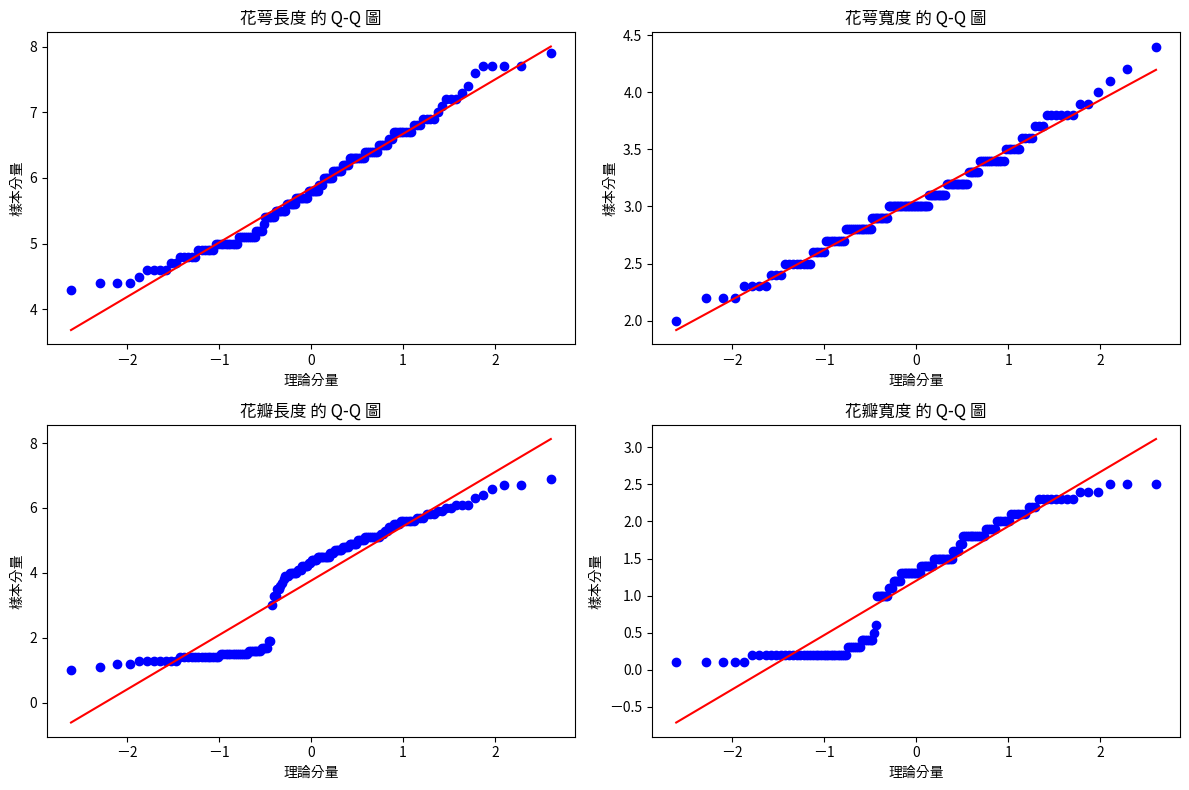

模型準確率: 1.00


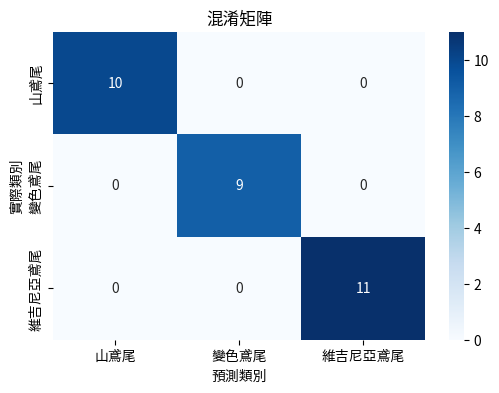


分類報告:
              precision    recall  f1-score   support

         山鳶尾       1.00      1.00      1.00        10
        變色鳶尾       1.00      1.00      1.00         9
      維吉尼亞鳶尾       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 設置中文字體（確保圖表顯示中文）
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 1. 載入 Iris 數據集
iris = load_iris()
X = iris.data  # 特徵：花萼長度、花萼寬度、花瓣長度、花瓣寬度
y = iris.target  # 類別：0, 1, 2（三種鳶尾花品種）
feature_names = ['花萼長度', '花萼寬度', '花瓣長度', '花瓣寬度']  # 特徵名稱改為中文
class_names = ['山鳶尾', '變色鳶尾', '維吉尼亞鳶尾']  # 類別名稱改為中文

# 2. 檢查特徵是否符合高斯分佈，使用 Q-Q 圖
plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    stats.probplot(X[:, i], dist="norm", plot=plt)
    plt.title(f'{feature_names[i]} 的 Q-Q 圖')
    plt.xlabel('理論分量')
    plt.ylabel('樣本分量')
plt.tight_layout()
plt.show()

# 3. 將數據分為訓練集和測試集（80% 訓練，20% 測試）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 訓練 GaussianNB 模型
model = GaussianNB()
model.fit(X_train, y_train)

# 5. 預測測試集
y_pred = model.predict(X_test)

# 6. 評估模型
# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率: {accuracy:.2f}")

# 繪製混淆矩陣
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('混淆矩陣')
plt.xlabel('預測類別')
plt.ylabel('實際類別')
plt.show()

# 輸出分類報告（精確率、召回率、F1 分數）
print("\n分類報告:")
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)